### 1.Setting up the working directory

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir("/content/drive/MyDrive/ML Assignment")

### 2.Reading the dataset

In [3]:
import pandas as pd

In [4]:
csv_file='diabetes_prediction_dataset_2.csv'
diabetes = pd.read_csv(csv_file)

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65638 entries, 0 to 65637
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               65638 non-null  object 
 1   age                  65638 non-null  float64
 2   hypertension         65638 non-null  int64  
 3   heart_disease        65638 non-null  int64  
 4   smoking_history      65638 non-null  object 
 5   bmi                  65638 non-null  float64
 6   HbA1c_level          65638 non-null  float64
 7   blood_glucose_level  65638 non-null  int64  
 8   diabetes             65638 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 4.5+ MB


### 3.Explore the data

In [6]:
diabetes.iloc[:,:-1].describe().style.background_gradient(axis=0,cmap='Accent')

In [7]:
diabetes.head(10).style.bar(axis=0)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
print("dimension of diabetes data: {}".format(diabetes.shape))

dimension of diabetes data: (65638, 9)


In [10]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65638 entries, 0 to 65637
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               65638 non-null  object 
 1   age                  65638 non-null  float64
 2   hypertension         65638 non-null  int64  
 3   heart_disease        65638 non-null  int64  
 4   smoking_history      65638 non-null  object 
 5   bmi                  65638 non-null  float64
 6   HbA1c_level          65638 non-null  float64
 7   blood_glucose_level  65638 non-null  int64  
 8   diabetes             65638 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 4.5+ MB


In [11]:
diabetes.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [12]:
pip install sweetviz

In [13]:
import sweetviz as sv

In [14]:
sv.analyze([diabetes,'Diabetes data' ], target_feat='diabetes').show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [15]:
features = diabetes.columns.drop('diabetes').tolist()

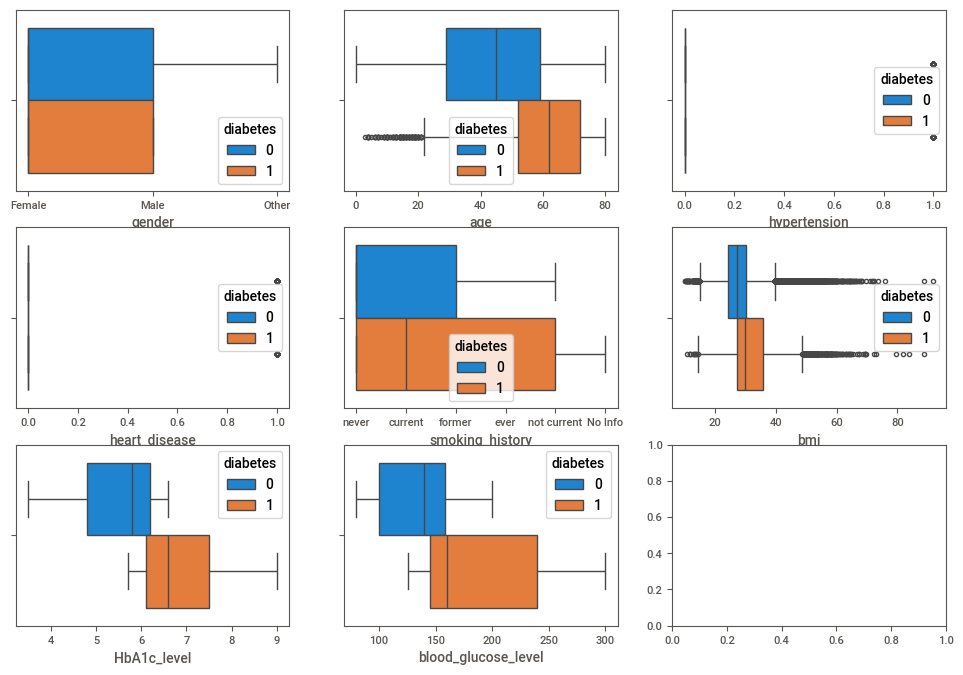

In [16]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12,8))
axs = axs.flatten()

for index, feature in enumerate(features):
  sns.boxplot(data=diabetes, x=feature, hue='diabetes', ax=axs[index])

In [17]:
corr_matrix = diabetes.corr()

<ipython-input-17-27e53b2ee576>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = diabetes.corr()


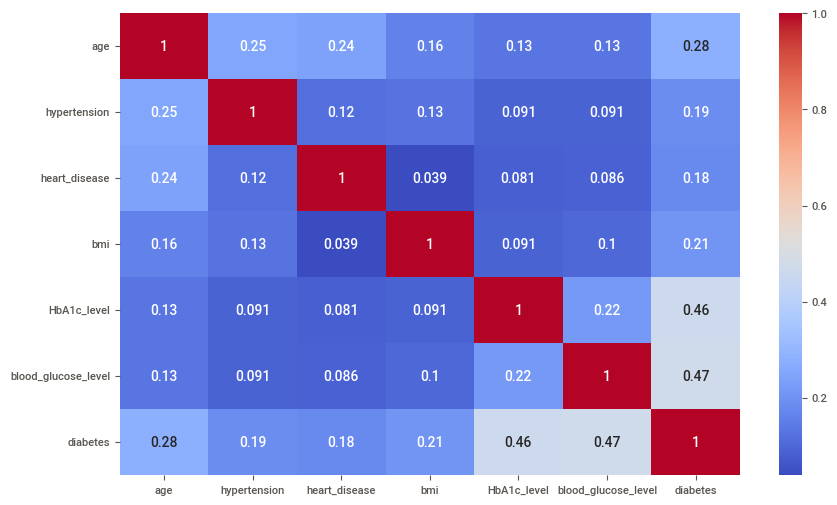

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm', ax=ax)
plt.show()

### 3.Data preprocessing

In [19]:
diabetes.shape

(65638, 9)

In [20]:
diabetes.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
65633    False
65634    False
65635    False
65636    False
65637    False
Length: 65638, dtype: bool

In [21]:
diabetes.duplicated().sum()

934

In [22]:
diabetes = diabetes.drop_duplicates()

In [23]:
diabetes.duplicated().sum()

0

In [24]:
diabetes.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1    Male  28.0             0              0           never  27.32   
2  Female  36.0             0              0         current  23.45   
3    Male  76.0             1              1         current  20.14   
4  Female  20.0             0              0           never  27.32   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          5.7                  158         0  
2          5.0                  155         0  
3          4.8                  155         0  
4          6.6                   85         0

In [25]:
diabetes.shape

(64704, 9)

In [26]:
diabetes

gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1        Male  28.0             0              0           never  27.32   
2      Female  36.0             0              0         current  23.45   
3        Male  76.0             1              1         current  20.14   
4      Female  20.0             0              0           never  27.32   
...       ...   ...           ...            ...             ...    ...   
65633  Female  26.0             0              0           never  34.34   
65634  Female  40.0             0              0           never  40.69   
65635    Male  66.0             0              0          former  27.83   
65636  Female  24.0             0              0           never  35.42   
65637  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140         0  
1              5.7                  158         0  
2              5.0                  155         0  
3              4.8                  155         0  
4              6.6                   85         0  
...            ...                  ...       ...  
65633          6.5                  160         0  
65634          3.5                  155         0  
65635          5.7                  155         0  
65636          4.0                  100         0  
65637          6.6                   90         0  

[64704 rows x 9 columns]

In [27]:
def binary_encoding(value):
  encode = value.map({'Yes':1, 'No':0})
  return encode

In [28]:
diabetes = diabetes.copy(deep=True)

In [29]:
diabetes['gender'].value_counts()

Female    38939
Male      25753
Other        12
Name: gender, dtype: int64

In [30]:
gender = pd.get_dummies(diabetes['gender'], drop_first=True)
diabetes = pd.concat([diabetes,gender], axis=1)
diabetes = diabetes.drop(['gender'], axis=1)

In [31]:
gender.head()

Male  Other
0     0      0
1     1      0
2     0      0
3     1      0
4     0      0

In [32]:
smoking = pd.get_dummies(diabetes['smoking_history'], drop_first=True)
diabetes = pd.concat([diabetes,smoking], axis=1)
diabetes = diabetes.drop(['smoking_history'], axis=1)

In [33]:
diabetes.head()

age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  28.0             0              0  27.32          5.7                  158   
2  36.0             0              0  23.45          5.0                  155   
3  76.0             1              1  20.14          4.8                  155   
4  20.0             0              0  27.32          6.6                   85   

   diabetes  Male  Other  current  ever  former  never  not current  
0         0     0      0        0     0       0      1            0  
1         0     1      0        0     0       0      1            0  
2         0     0      0        1     0       0      0            0  
3         0     1      0        1     0       0      0            0  
4         0     0      0        0     0       0      1            0

**Devide Data Set**

In [34]:
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split

In [35]:
X = diabetes.iloc[:,:-1].values   ##features selection
y = diabetes.iloc[:,-1].values

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=123)

In [37]:
y_test = pd.Series(y_test)

In [38]:
y_test.value_counts(normalize=True)

0    0.901607
1    0.098393
dtype: float64

In [39]:
missing_values = diabetes.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
age                    0
hypertension           0
heart_disease          0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
Male                   0
Other                  0
current                0
ever                   0
former                 0
never                  0
not current            0
dtype: int64


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
features_updated = diabetes.columns.drop(['diabetes', 'blood_glucose_level']).tolist()

In [42]:
print(features_updated)

['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'Male', 'Other', 'current', 'ever', 'former', 'never', 'not current']


**Model Development**

*   Logistic Regression



In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred_log_reg = log_reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
y_pred_log_reg

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [46]:
features_names=['age','hypertension','heart_disease','bmi','HbA1c_level','blood_glucose_level','Male','Other','current','ever','former','never','not current']

In [47]:
log_reg.coef_

array([[ 9.55331011e-03, -4.98474997e-02, -5.70354298e-01,
         3.70843785e-02,  2.49774681e-01,  3.02984165e-03,
        -5.32256411e+00, -6.06687913e-01,  7.64901274e-02,
        -8.61803541e+00, -8.08638637e+00, -8.67879545e+00,
        -2.55943354e+01]])

In [48]:
lr_base_coef_df = pd.DataFrame({'feature':features_names, 'lr_coef':log_reg.coef_[0]})
lr_base_coef_df

feature    lr_coef
0                   age   0.009553
1          hypertension  -0.049847
2         heart_disease  -0.570354
3                   bmi   0.037084
4           HbA1c_level   0.249775
5   blood_glucose_level   0.003030
6                  Male  -5.322564
7                 Other  -0.606688
8               current   0.076490
9                  ever  -8.618035
10               former  -8.086386
11                never  -8.678795
12          not current -25.594335

*Cross Validate*

In [49]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [50]:
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [51]:
cv_scores_accuracy  = cross_val_score(log_reg, X_train, y_train, cv=stratified_kfold, scoring='accuracy')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [52]:
mean_accuracy = cv_scores_accuracy.mean()
print("Accuracy Scores: ", cv_scores_accuracy)
print("Mean Accuracy:", mean_accuracy)

Accuracy Scores:  [0.98874048 0.98885087 0.98973283 0.98929123 0.98862884]
Mean Accuracy: 0.9890488498267691


*Visualizations for classification metrices / reports*

In [53]:
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier import class_prediction_error
from yellowbrick.classifier import classification_report
from yellowbrick.classifier import roc_auc

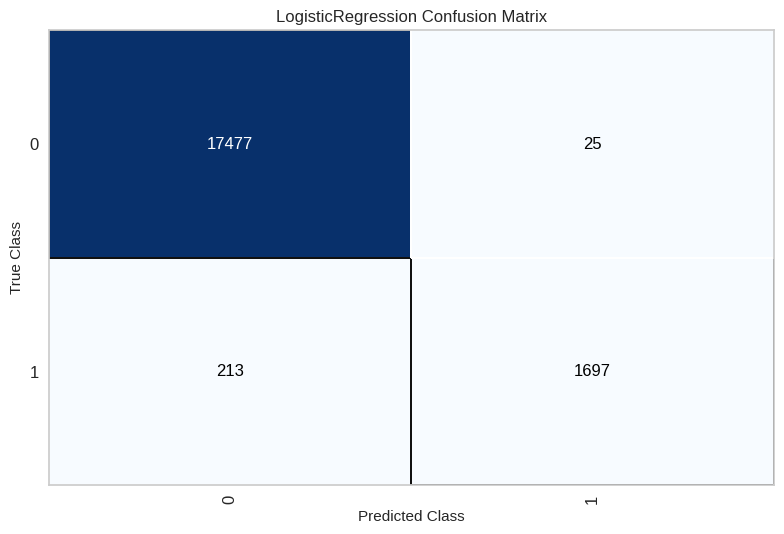

In [54]:
conf_matrix_log_reg_base = confusion_matrix(log_reg, X_test, y_test, cmap="blues")

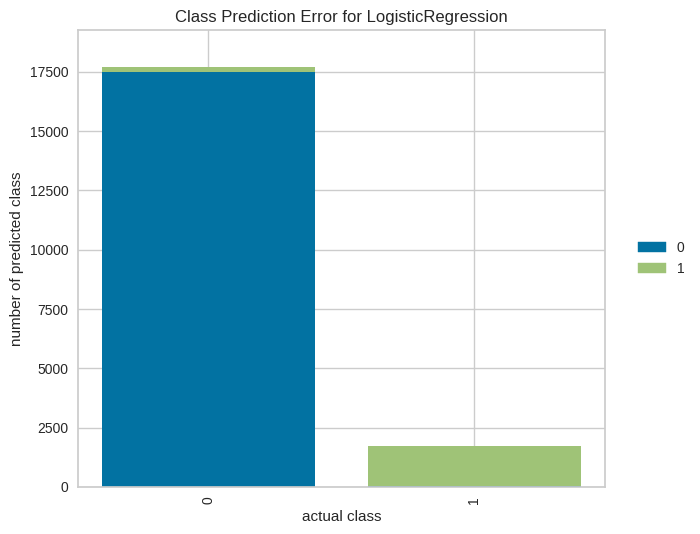

ClassPredictionError(ax=<Axes: title={'center': 'Class Prediction Error for LogisticRegression'}, xlabel='actual class', ylabel='number of predicted class'>,
                     estimator=LogisticRegression())

In [55]:
class_prediction_error(log_reg, X_test, y_test)

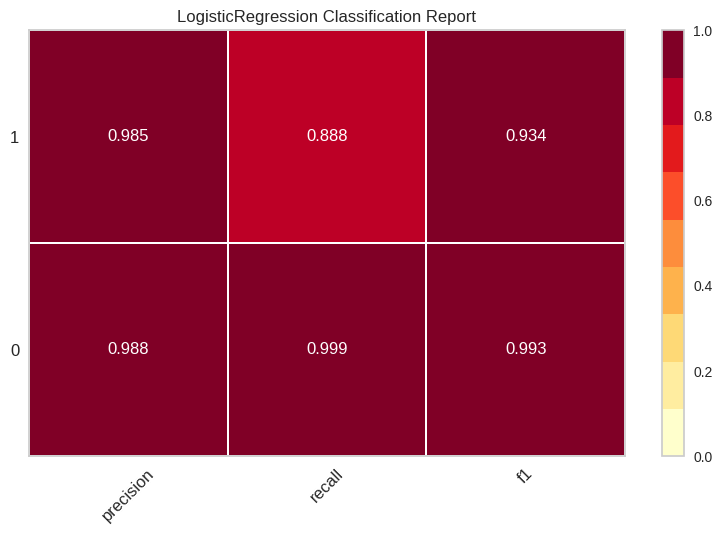

In [56]:
class_report_log_reg_base = classification_report(log_reg, X_test, y_test)

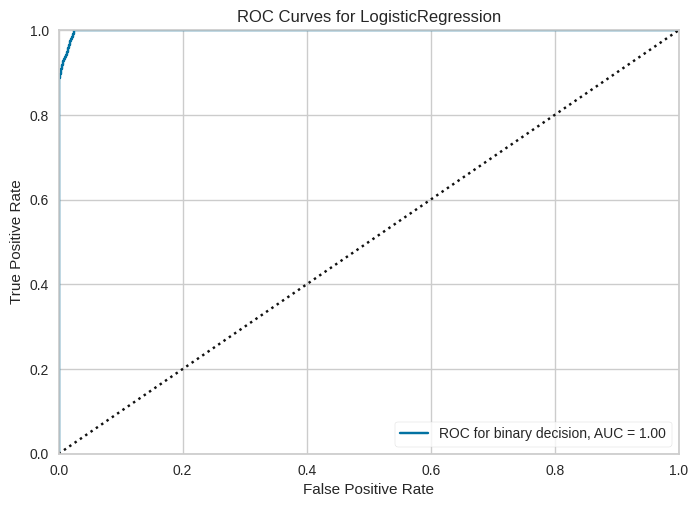

In [57]:
roc_log_reg_base = roc_auc(log_reg, X_test, y_test, binary=True)

*   Decision Trees







In [58]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [59]:
clf_dt = DecisionTreeClassifier(random_state=55)

In [60]:
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=55)

In [61]:
y_pred_dt = clf_dt.predict(X_test)

In [62]:
accuracy_score(y_test, y_pred_dt)

0.9851123016690707

In [63]:
accuracy_score(y_train, clf_dt.predict(X_train))

1.0

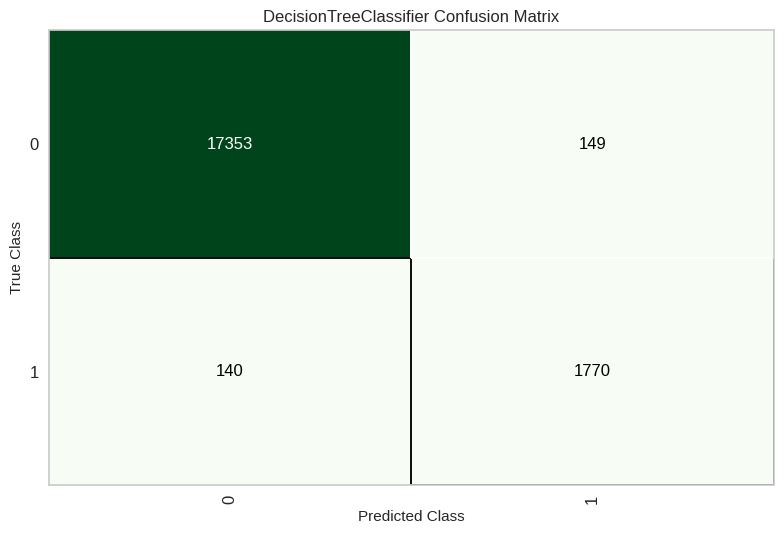

ConfusionMatrix(ax=<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                cmap=<matplotlib.colors.ListedColormap object at 0x7ce8d0146ce0>,
                estimator=DecisionTreeClassifier(random_state=55))

In [64]:
confusion_matrix(clf_dt, X_test, y_test, cmap="Greens")

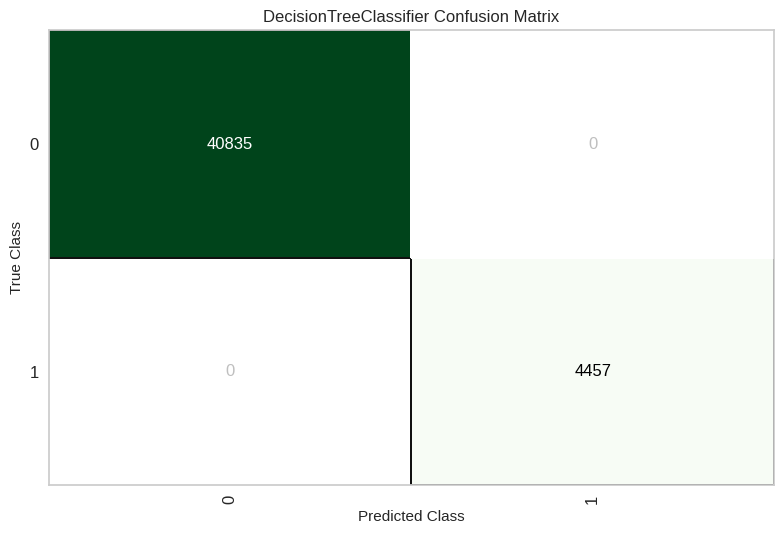

ConfusionMatrix(ax=<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                cmap=<matplotlib.colors.ListedColormap object at 0x7ce8d0318af0>,
                estimator=DecisionTreeClassifier(random_state=55))

In [65]:
confusion_matrix(clf_dt, X_train, y_train, cmap="Greens")

In [66]:
print(type(X_train))

<class 'numpy.ndarray'>


In [67]:
X_train = pd.DataFrame(X_train)

In [68]:
plt.figure(figsize=(200,50))
plot_tree(clf_dt,
          filled=True,
          rounded=True,
          class_names=True,
          feature_names=X_train.columns);

In [69]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path['ccp_alphas']

In [70]:
ccp_alpahs = ccp_alphas[:-1]

In [71]:
clf_dts = []

for ccp_alpha in ccp_alphas:
  clf_dt_ = DecisionTreeClassifier(random_state=55, ccp_alpha=ccp_alpha)
  clf_dt_.fit(X_train, y_train)
  clf_dts.append(clf_dt_)

In [72]:
train_scores = [clf_dt_.score(X_train, y_train) for clf_dt_ in clf_dts]
test_scores = [clf_dt_.score(X_test, y_test) for clf_dt_ in clf_dts]

*plotting the train scores and test scores*

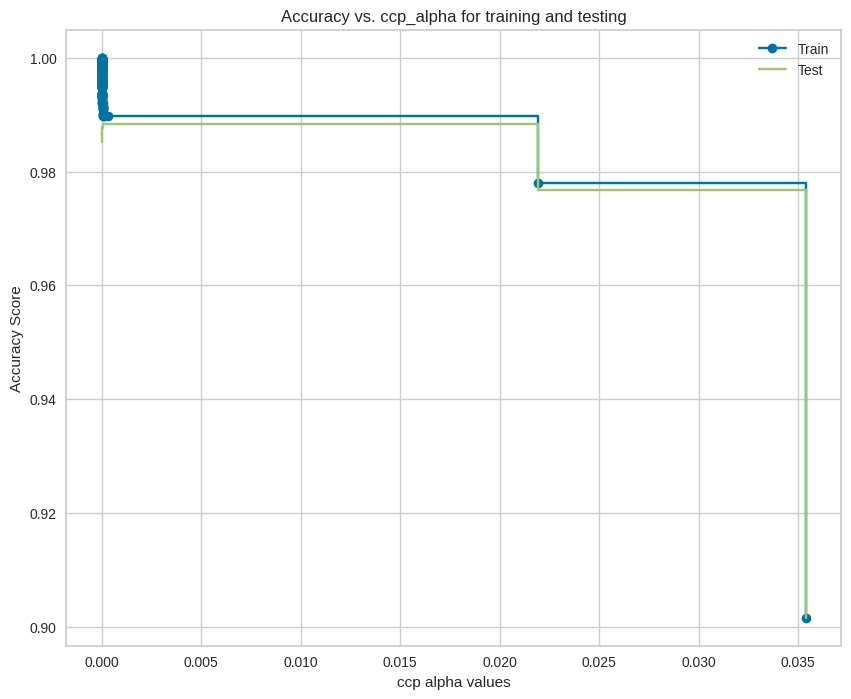

In [73]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel("ccp alpha values")
ax.set_ylabel("Accuracy Score")
ax.set_title("Accuracy vs. ccp_alpha for training and testing")

ax.plot(ccp_alphas, train_scores, marker='o', label="Train", drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='x', label="Test", drawstyle='steps-post')
ax.legend()
plt.show()

In [74]:
ccp_alpha_best = 0.15

*pruned decision tree*

In [75]:
clf_dt_pruned = DecisionTreeClassifier(random_state=55, ccp_alpha=ccp_alpha_best)
clf_dt_pruned.fit(X_train, y_train)
y_pred_res_pruned = clf_dt_pruned.predict(X_test)

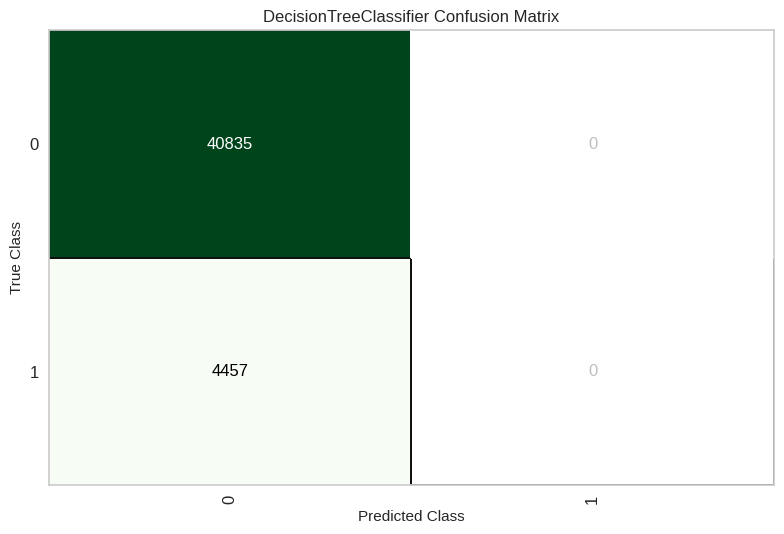

ConfusionMatrix(ax=<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                cmap=<matplotlib.colors.ListedColormap object at 0x7ce8d01ad3c0>,
                estimator=DecisionTreeClassifier(ccp_alpha=0.15,
                                                 random_state=55))

In [76]:
confusion_matrix(clf_dt_pruned, X_train, y_train, cmap="Greens")

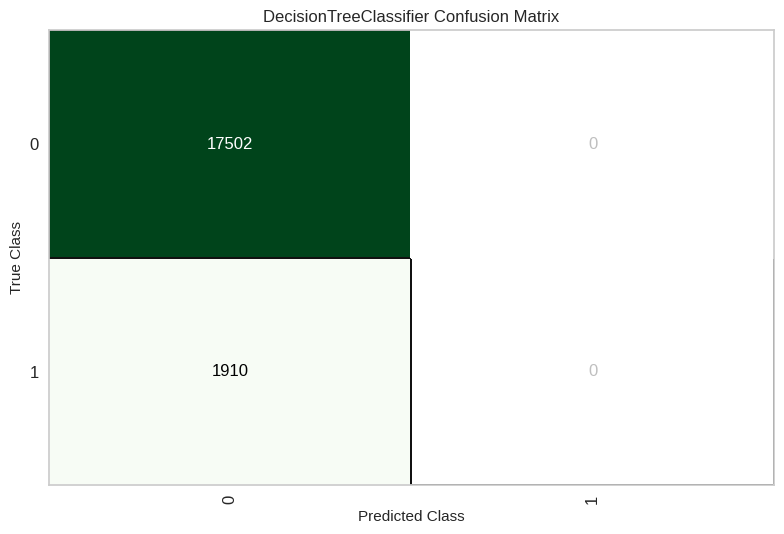

ConfusionMatrix(ax=<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                cmap=<matplotlib.colors.ListedColormap object at 0x7ce8d06054b0>,
                estimator=DecisionTreeClassifier(ccp_alpha=0.15,
                                                 random_state=55))

In [77]:
confusion_matrix(clf_dt_pruned, X_test, y_test, cmap="Greens")

In [78]:
plt.figure(figsize=(200,50))
plot_tree(clf_dt_pruned,
          filled=True,
          rounded=True,
          class_names=True,
          feature_names=X_train.columns);

*   Support Vector Machines



In [79]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

In [80]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [81]:
# Evaluate performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print("Performance Metrics for Support Vector Machine:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_svm)


Performance Metrics for Support Vector Machine:
Accuracy: 0.9016072532454152
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


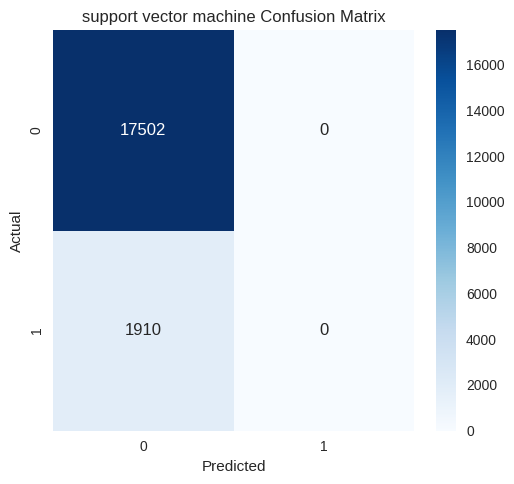

In [82]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
import seaborn as sns

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='g')
plt.title('support vector machine Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

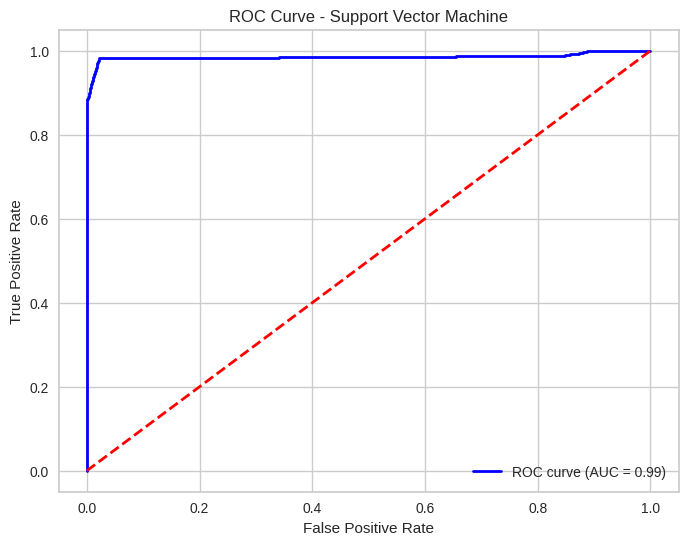

In [83]:
y_prob_svm = svm.decision_function(X_test)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Support Vector Machine')
plt.legend(loc='lower right')
plt.show()

In [84]:
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier

In [85]:
!pip install scikit-plot
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

In [86]:
random_forest = RandomForestClassifier()

In [87]:
random_forest.fit(X_train, y_train)

RandomForestClassifier()

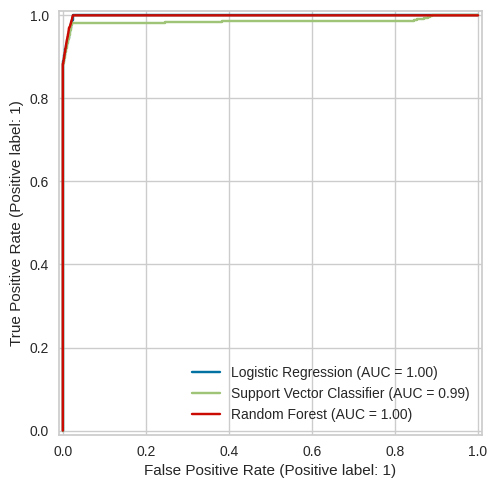

In [88]:
ax = plt.gca()

LogReg = RocCurveDisplay.from_estimator(log_reg, X_test, y_test,
                                        ax=ax, name="Logistic Regression")
SVC = RocCurveDisplay.from_estimator(svm, X_test, y_test,
                                        ax=ax, name="Support Vector Classifier")
RandForest = RocCurveDisplay.from_estimator(random_forest, X_test, y_test,
                                        ax=ax, name="Random Forest")
plt.show()

**01. Briefly describe why the selected algorithm is the most suitable choice**



*   There is three models that trained to predict diabates of patients. According to above models we can consider as the best fit model the logistic regression model. To that we can consider their accuracy level and error level.  In logistic regression It is best fit for the data set


**02. Describe the challenges faced during the task and how you overcame them in
bullet points**


The following are some of the challenges that come up when creating a task

1.   **Data preprocessing**:


*   *Imbalanced Data:*
The dataset may have imbalanced class distribution, with one class dominating the other. To balance the dataset, oversamplication, undersamplication, or even synthetic data generation can be used.

*   *Missing values:*
Some features may have missing values in the dataset. To address this, the missing values can be imputed using methods such as Mean Imputation, Median Imputation, or Predictive Imputation.


*   *Feature scaling*:
The features may have different scales, which can lead to biased models. To fix this, standardize or normalize the features to bring them into line with the model.




2.  **Model selection and tuning:**


*   Each model has its own hyperparameter that needs to be fine-tuned for optimal performance. To select the best model for the problem, perform a comparative analysis of the models (Logistic regression model, SVM model, decision tree model, etc.)

3.   **Evaluation of Model Performance:**


*   *Overfitting or Underfitting:*
Models may exhibit overfitting (where noise in the training data is captured) or underfitting (where the underlying patterns are not captured).To prevent overfitting, regularize the models (e.g., by modifying the C parameter for SVM, or by using L1 or L2 regularization for logistic regression); to address underfitting, raise the complexity of the model.

*   *Metrics for Evaluation:*
Selecting the right assessment criteria is essential for evaluating model performance.To thoroughly assess model performance, use measures like ROC-AUC, F1-score, accuracy, precision, recall, and confusion matrix analysis.


4.   **Interpretability:**


*   *Interpretability of Results:*
Some models, like decision trees, are more interpretable than others, such as SVM.
Solution: Use model-agnostic interpretability techniques like feature importance analysis or SHAP (SHapley Additive exPlanations) values to interpret and explain model predictions, especially for less interpretable models like SVM.
By addressing these challenges through careful data preprocessing, model selection and tuning, performance evaluation, and interpretability, you can create robust diabetes classification machine learning models using logistic regression, SVM, and decision trees.